In [1]:
import pandas as pd

# Load the uploaded files
file_path_1 = 'credit_risk_file_1.xlsx'
file_path_2 = 'credit_risk_file_2.xlsx'

# Load the data from both files
data_1 = pd.ExcelFile(file_path_1)
data_2 = pd.ExcelFile(file_path_2)

# Extract sheet names to understand structure
sheet_names_1 = data_1.sheet_names
sheet_names_2 = data_2.sheet_names

sheet_names_1, sheet_names_2


(['case_study1'], ['case_study2'])

In [3]:
# Load the data from the specific sheets
df_1 = data_1.parse('case_study1')
df_2 = data_2.parse('case_study2')

# Display the first few rows and basic info of each dataset
df_1_overview = {
    "shape": df_1.shape,
    "columns": df_1.columns.tolist(),
    "head": df_1.head()
}

df_2_overview = {
    "shape": df_2.shape,
    "columns": df_2.columns.tolist(),
    "head": df_2.head()
}

df_1_overview, df_2_overview


({'shape': (51336, 26),
  'columns': ['PROSPECTID',
   'Total_TL',
   'Tot_Closed_TL',
   'Tot_Active_TL',
   'Total_TL_opened_L6M',
   'Tot_TL_closed_L6M',
   'pct_tl_open_L6M',
   'pct_tl_closed_L6M',
   'pct_active_tl',
   'pct_closed_tl',
   'Total_TL_opened_L12M',
   'Tot_TL_closed_L12M',
   'pct_tl_open_L12M',
   'pct_tl_closed_L12M',
   'Tot_Missed_Pmnt',
   'Auto_TL',
   'CC_TL',
   'Consumer_TL',
   'Gold_TL',
   'Home_TL',
   'PL_TL',
   'Secured_TL',
   'Unsecured_TL',
   'Other_TL',
   'Age_Oldest_TL',
   'Age_Newest_TL'],
  'head':    PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
  0           1         5              4              1                    0   
  1           2         1              0              1                    0   
  2           3         8              0              8                    1   
  3           4         1              0              1                    1   
  4           5         3              2           

In [5]:
# Merge the two datasets on the common column 'PROSPECTID'
merged_data = pd.merge(df_1, df_2, on="PROSPECTID", how="inner")

# Check the structure of the merged dataset
merged_overview = {
    "shape": merged_data.shape,
    "columns": merged_data.columns.tolist(),
    "missing_values": merged_data.isnull().sum().sum(),
    "sample_data": merged_data.head()
}

merged_overview


{'shape': (51336, 87),
 'columns': ['PROSPECTID',
  'Total_TL',
  'Tot_Closed_TL',
  'Tot_Active_TL',
  'Total_TL_opened_L6M',
  'Tot_TL_closed_L6M',
  'pct_tl_open_L6M',
  'pct_tl_closed_L6M',
  'pct_active_tl',
  'pct_closed_tl',
  'Total_TL_opened_L12M',
  'Tot_TL_closed_L12M',
  'pct_tl_open_L12M',
  'pct_tl_closed_L12M',
  'Tot_Missed_Pmnt',
  'Auto_TL',
  'CC_TL',
  'Consumer_TL',
  'Gold_TL',
  'Home_TL',
  'PL_TL',
  'Secured_TL',
  'Unsecured_TL',
  'Other_TL',
  'Age_Oldest_TL',
  'Age_Newest_TL',
  'time_since_recent_payment',
  'time_since_first_deliquency',
  'time_since_recent_deliquency',
  'num_times_delinquent',
  'max_delinquency_level',
  'max_recent_level_of_deliq',
  'num_deliq_6mts',
  'num_deliq_12mts',
  'num_deliq_6_12mts',
  'max_deliq_6mts',
  'max_deliq_12mts',
  'num_times_30p_dpd',
  'num_times_60p_dpd',
  'num_std',
  'num_std_6mts',
  'num_std_12mts',
  'num_sub',
  'num_sub_6mts',
  'num_sub_12mts',
  'num_dbt',
  'num_dbt_6mts',
  'num_dbt_12mts',
  'n

In [7]:
import numpy as np

# Replace -99999 with NaN column by column to avoid recursion issues
merged_data_cleaned = merged_data.copy()
for column in merged_data_cleaned.columns:
    merged_data_cleaned[column] = merged_data_cleaned[column].replace(-99999, np.nan)

# Recalculate missing values
missing_values_summary_fixed = merged_data_cleaned.isnull().sum().reset_index()
missing_values_summary_fixed.columns = ['Column', 'Missing_Values']
missing_values_summary_fixed['Percentage'] = (
    missing_values_summary_fixed['Missing_Values'] / len(merged_data_cleaned) * 100
)
missing_values_summary_fixed = missing_values_summary_fixed[missing_values_summary_fixed['Missing_Values'] > 0]

# Sort by percentage of missing values for better understanding
missing_values_summary_fixed = missing_values_summary_fixed.sort_values(by='Percentage', ascending=False)

# Display the updated missing values analysis to the user
missing_values_summary_fixed

,Column,Missing_Values,Percentage
72,CC_utilization,47636,92.792582
74,PL_utilization,44435,86.557192
27,time_since_first_deliquency,35949,70.026882
28,time_since_recent_deliquency,35949,70.026882
30,max_delinquency_level,35949,70.026882
80,max_unsec_exposure_inPct,23178,45.149603
35,max_deliq_6mts,12890,25.109085
36,max_deliq_12mts,10832,21.100203
58,PL_enq_L12m,6321,12.312997
62,enq_L3m,6321,12.312997


In [9]:
# Analyze columns with missing values to decide the imputation strategy
missing_columns = missing_values_summary_fixed['Column'].tolist()
imputation_strategies = []

for column in missing_columns:
    unique_values = merged_data_cleaned[column].nunique()
    dtype = merged_data_cleaned[column].dtype
    if dtype in ['float64', 'int64']:
        # Continuous or discrete numerical variable
        if unique_values > 10:
            strategy = 'mean' if merged_data_cleaned[column].skew() < 1 else 'median'
        else:
            strategy = 'mode'  # Categorical-like numerical variable
    else:
        strategy = 'mode'  # Categorical variable
    imputation_strategies.append((column, strategy))

# Present suggested imputation strategies
imputation_plan = pd.DataFrame(imputation_strategies, columns=['Column', 'Suggested_Strategy'])
imputation_plan


,Column,Suggested_Strategy
0,CC_utilization,median
1,PL_utilization,mean
2,time_since_first_deliquency,mean
3,time_since_recent_deliquency,mean
4,max_delinquency_level,median
5,max_unsec_exposure_inPct,median
6,max_deliq_6mts,median
7,max_deliq_12mts,median
8,PL_enq_L12m,median
9,enq_L3m,median


In [11]:
# Apply imputation based on the suggested strategies
for column, strategy in imputation_strategies:
    if strategy == 'mean':
        merged_data_cleaned[column].fillna(merged_data_cleaned[column].mean(), inplace=True)
    elif strategy == 'median':
        merged_data_cleaned[column].fillna(merged_data_cleaned[column].median(), inplace=True)
    elif strategy == 'mode':
        merged_data_cleaned[column].fillna(merged_data_cleaned[column].mode()[0], inplace=True)

# Verify if there are any remaining missing values
remaining_missing_values = merged_data_cleaned.isnull().sum().sum()

remaining_missing_values


C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_14464\1872668765.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data_cleaned[column].fillna(merged_data_cleaned[column].median(), inplace=True)
C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_14464\1872668765.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

0

In [20]:
# Summary statistics for numerical variables
summary_stats = merged_data_cleaned.describe().transpose()

# Analyze target variable (Approved_Flag)
target_analysis = merged_data_cleaned['Approved_Flag'].value_counts(normalize=True).reset_index()
target_analysis.columns = ['Approved_Flag', 'Percentage']

# Display the summary statistics and target variable analysis
summary_stats
target_analysis

,Approved_Flag,Percentage
0,P2,0.627221
1,P3,0.145161
2,P4,0.114578
3,P1,0.113040


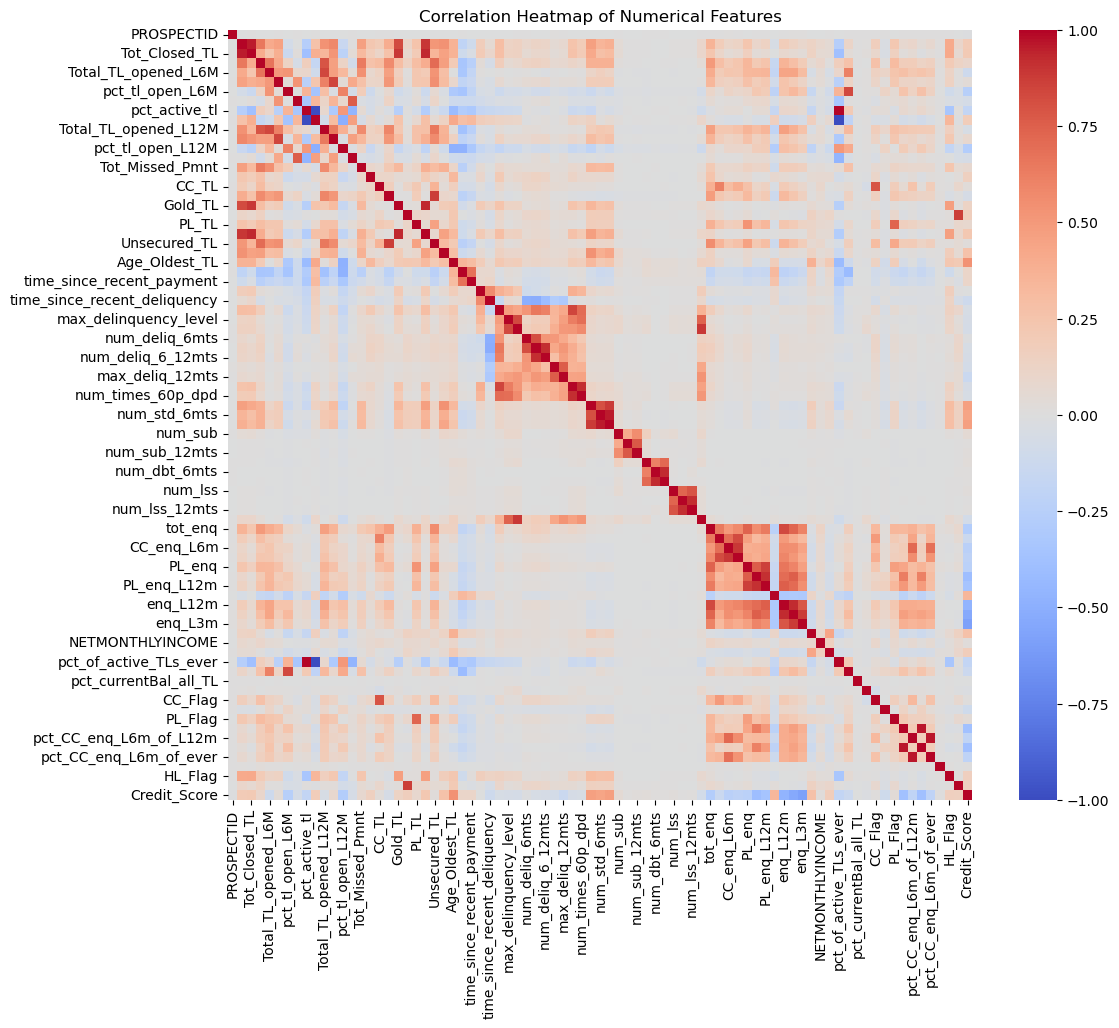

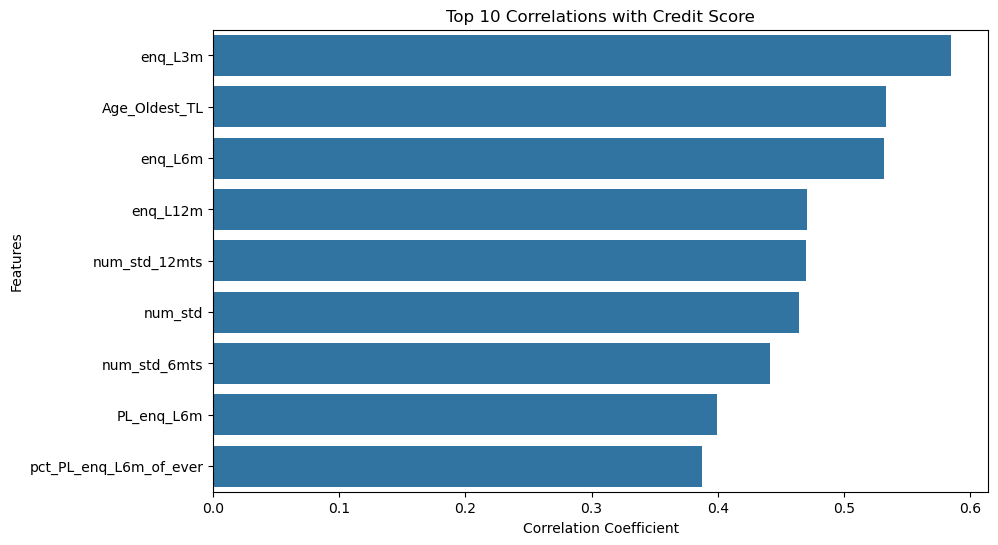

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for only numerical columns to calculate correlations
numerical_data = merged_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Recompute the correlation matrix for numerical features only
correlation_matrix = numerical_data.corr()

# Select the top correlations with 'Credit_Score' (if available)
if 'Credit_Score' in correlation_matrix.columns:
    target_correlations = correlation_matrix['Credit_Score'].abs().sort_values(ascending=False)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# If 'Credit_Score' exists, display its top correlations as a bar chart
if 'Credit_Score' in correlation_matrix.columns:
    top_correlations = target_correlations.head(10).drop('Credit_Score')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_correlations.values, y=top_correlations.index)
    plt.title("Top 10 Correlations with Credit Score")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Features")
    plt.show()



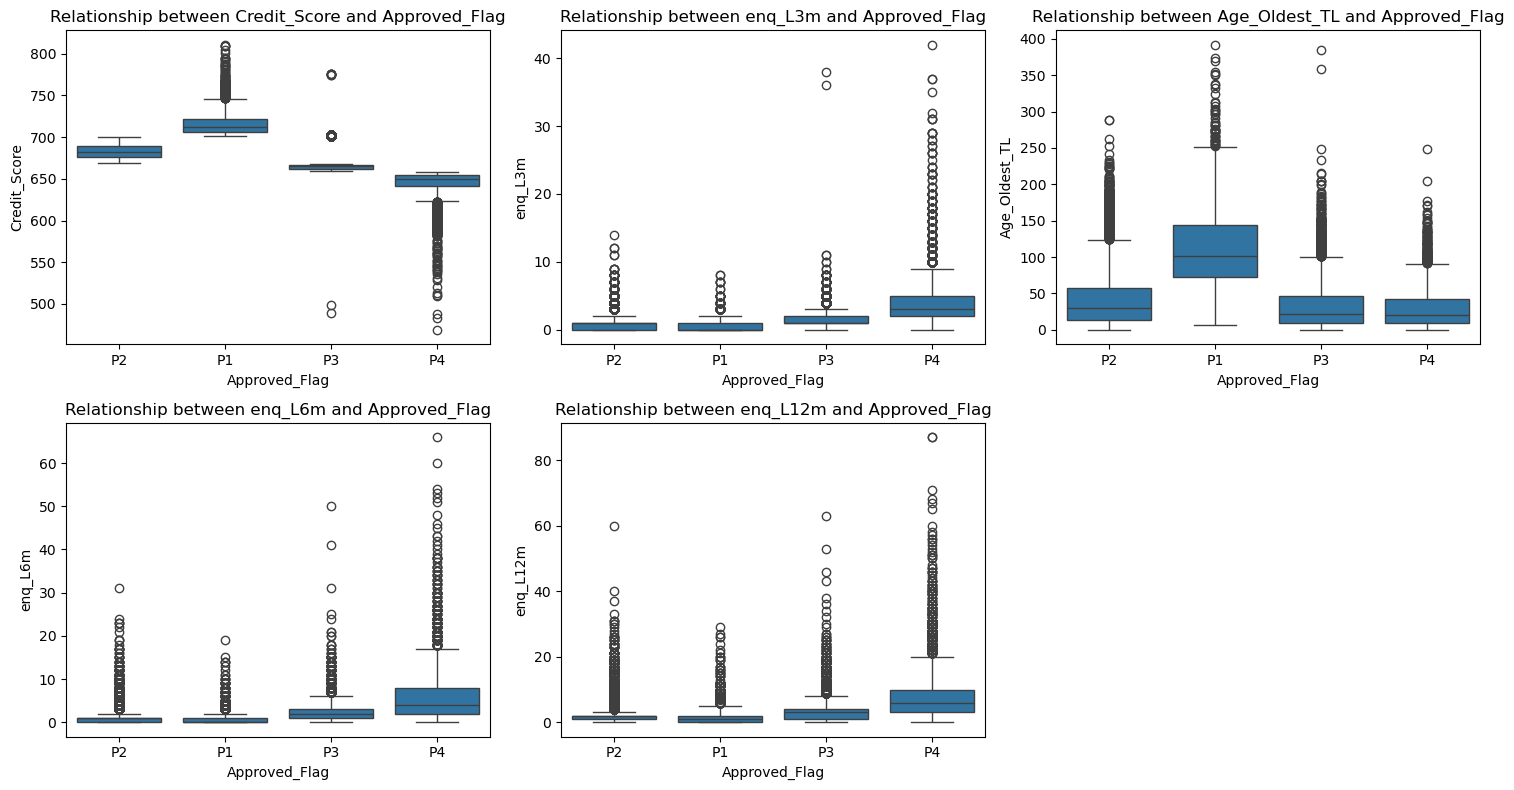

In [26]:
# Check if Approved_Flag is categorical and ensure it's properly handled for visualization
merged_data_cleaned['Approved_Flag'] = merged_data_cleaned['Approved_Flag'].astype(str)

# Select top numerical features to explore their relationship with Approved_Flag
top_features = numerical_data.corrwith(merged_data_cleaned['Credit_Score']).abs().sort_values(ascending=False).head(5).index

# Create boxplots to visualize the relationship between top features and Approved_Flag
plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=merged_data_cleaned['Approved_Flag'], y=merged_data_cleaned[feature])
    plt.title(f"Relationship between {feature} and Approved_Flag")
    plt.xlabel("Approved_Flag")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Ensure the target variable is properly encoded
if 'Approved_Flag_Encoded' not in merged_data_cleaned.columns:
    merged_data_cleaned['Approved_Flag_Encoded'] = label_encoder.fit_transform(merged_data_cleaned['Approved_Flag'])

# Define features (X) and target (y)
X = merged_data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Approved_Flag_Encoded'], errors='ignore')
y = merged_data_cleaned['Approved_Flag_Encoded']

# Re-split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Retrain the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features influencing approvals
feature_importances


,Feature,Importance
80,Credit_Score,0.518824
24,Age_Oldest_TL,0.052588
62,enq_L3m,0.037308
61,enq_L6m,0.032570
59,time_since_recent_enq,0.029667
...,...,...
43,num_sub_6mts,0.000040
47,num_dbt_12mts,0.000038
46,num_dbt_6mts,0.000010
49,num_lss_6mts,0.000005


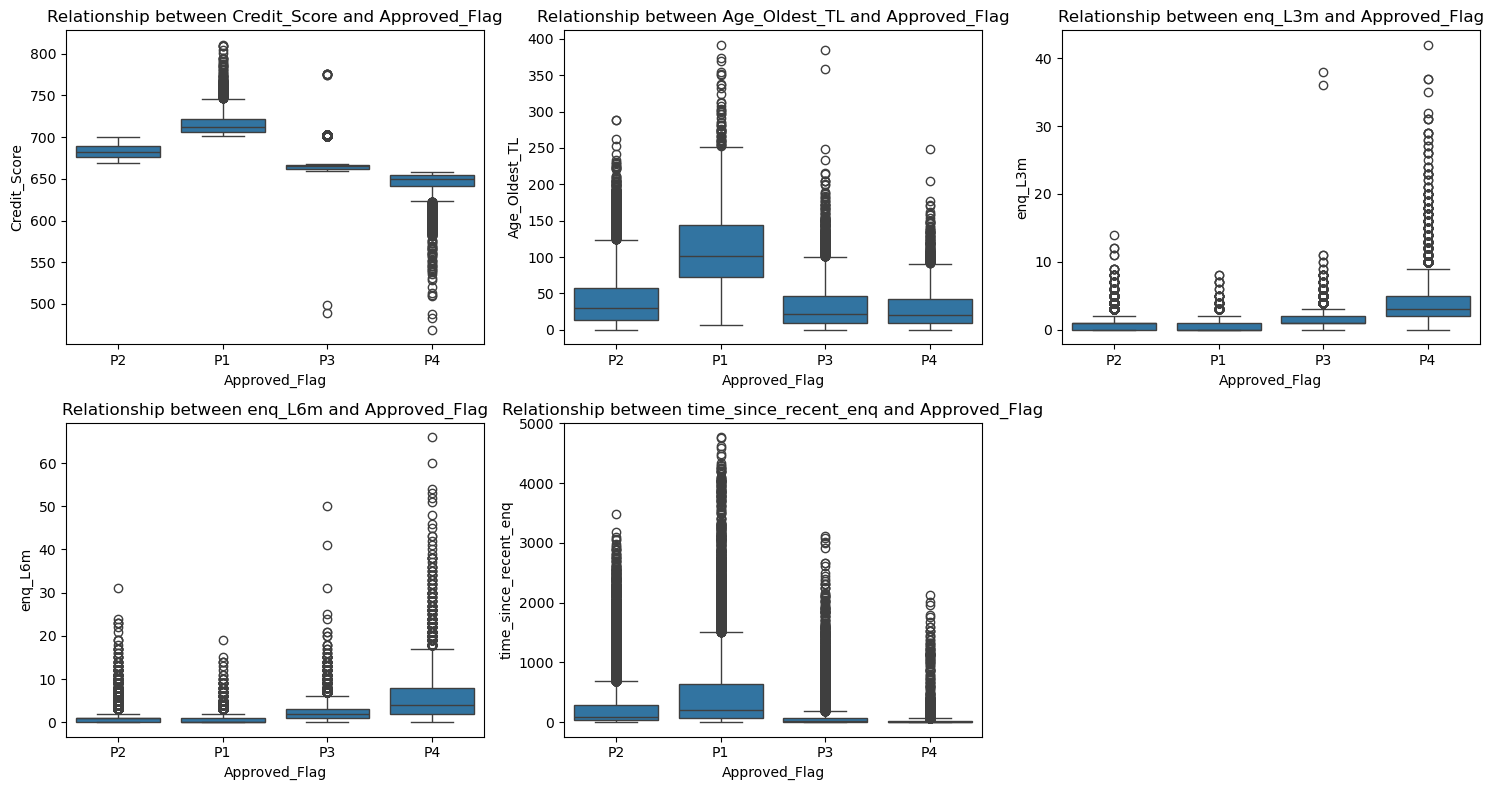

In [34]:
# Select the top features for visualization
top_features_for_visualization = feature_importances.head(5)['Feature']

# Create pair plots or box plots for the top features against Approved_Flag
plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_features_for_visualization, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=merged_data_cleaned['Approved_Flag'], y=merged_data_cleaned[feature])
    plt.title(f"Relationship between {feature} and Approved_Flag")
    plt.xlabel("Approved_Flag")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


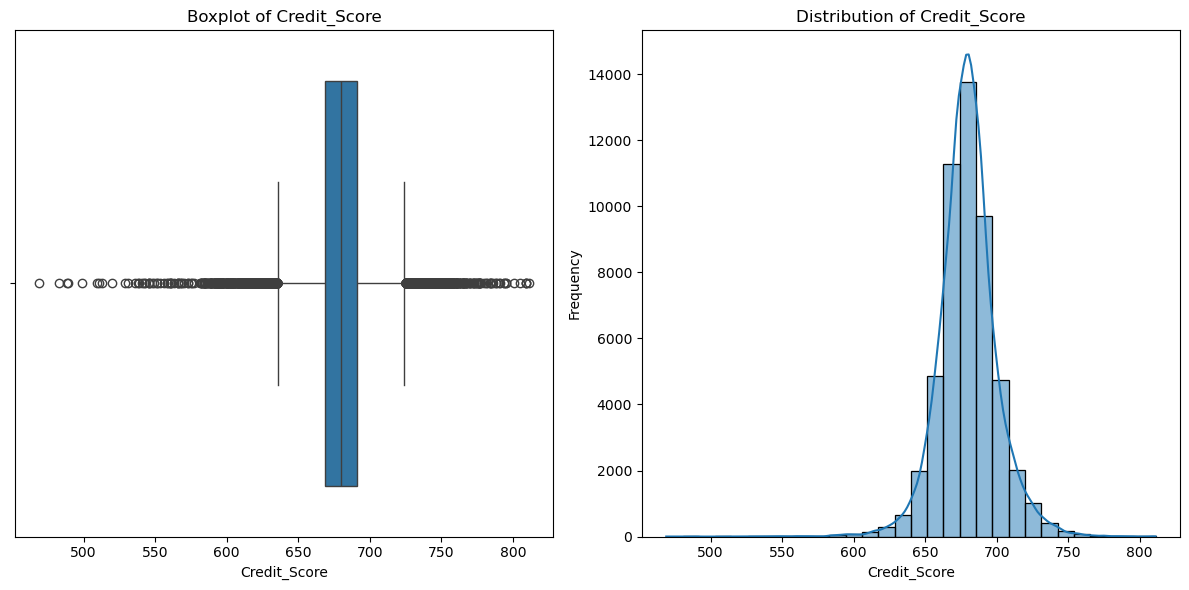

In [36]:
# Visualize outliers in Credit_Score using a boxplot and histogram
plt.figure(figsize=(12, 6))

# Boxplot for outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=merged_data_cleaned['Credit_Score'])
plt.title("Boxplot of Credit_Score")
plt.xlabel("Credit_Score")

# Histogram for distribution
plt.subplot(1, 2, 2)
sns.histplot(merged_data_cleaned['Credit_Score'], bins=30, kde=True)
plt.title("Distribution of Credit_Score")
plt.xlabel("Credit_Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


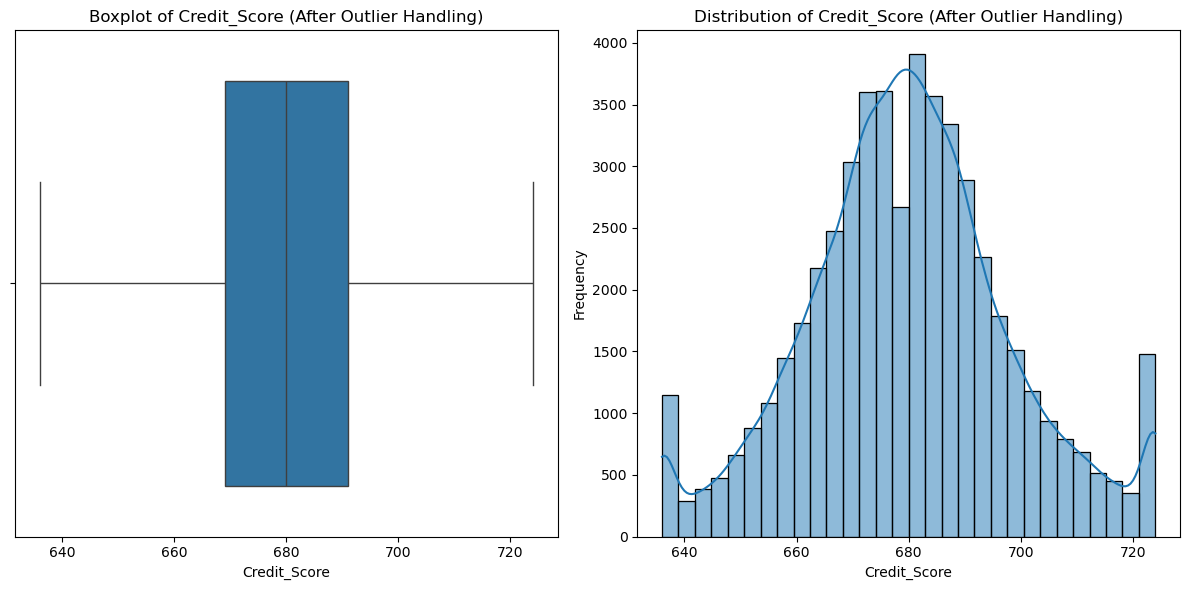

In [38]:
# Handle outliers using the IQR method
Q1 = merged_data_cleaned['Credit_Score'].quantile(0.25)
Q3 = merged_data_cleaned['Credit_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers at the thresholds
merged_data_cleaned['Credit_Score'] = merged_data_cleaned['Credit_Score'].clip(lower=lower_bound, upper=upper_bound)

# Verify the updated distribution of Credit_Score after outlier handling
plt.figure(figsize=(12, 6))

# Updated boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=merged_data_cleaned['Credit_Score'])
plt.title("Boxplot of Credit_Score (After Outlier Handling)")
plt.xlabel("Credit_Score")

# Updated histogram
plt.subplot(1, 2, 2)
sns.histplot(merged_data_cleaned['Credit_Score'], bins=30, kde=True)
plt.title("Distribution of Credit_Score (After Outlier Handling)")
plt.xlabel("Credit_Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
